In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
data = pd.read_csv('uber.csv')
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
data.shape

(200000, 9)

In [8]:
data = data.drop(['Unnamed: 0', 'key'], axis = 1)

In [9]:
data['month'] = data['pickup_datetime']
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06 UTC
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56 UTC
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00 UTC
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21 UTC
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:47:00 UTC
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28 10:49:00 UTC
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14 01:09:00 UTC
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29 00:42:00 UTC
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20 14:56:25 UTC


In [10]:
data['month'] = data['month'].str.slice(start = 5, stop = 7)
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,05
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,07
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,08
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,06
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,08
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,10
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,03
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,06
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,05


In [11]:
data['hour'] = data['pickup_datetime']
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,05,2015-05-07 19:52:06 UTC
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,07,2009-07-17 20:04:56 UTC
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,08,2009-08-24 21:45:00 UTC
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,06,2009-06-26 08:22:21 UTC
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,08,2014-08-28 17:47:00 UTC


In [12]:
data['hour'] = data['hour'].str.slice(start = 11, stop = 13)
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,hour
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,05,19
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,07,20
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,08,21
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,06,08
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,08,17


In [13]:
data = data.drop(['pickup_datetime'], axis = 1)

In [14]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   month              200000 non-null  object 
 7   hour               200000 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [17]:
def haversine (lon_1, lon_2, lat_1, lat_2):
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    return km

In [18]:
data['distance'] = haversine(data['pickup_longitude'],data['dropoff_longitude'],data['pickup_latitude'],data['dropoff_latitude'])

In [19]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000,199999.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,20.855350
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997,382.964642
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875169
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135


In [20]:
data.replace(to_replace = 0, value = data['passenger_count'].mean(), inplace=True)
data.replace(to_replace = 0, value = data['distance'].mean(), inplace=True)
data[data['fare_amount'] <= 0] = data['fare_amount'].mean()

fare_amount             Axes(0.125,0.712609;0.352273x0.167391)
pickup_longitude     Axes(0.547727,0.712609;0.352273x0.167391)
pickup_latitude         Axes(0.125,0.511739;0.352273x0.167391)
dropoff_longitude    Axes(0.547727,0.511739;0.352273x0.167391)
dropoff_latitude         Axes(0.125,0.31087;0.352273x0.167391)
passenger_count       Axes(0.547727,0.31087;0.352273x0.167391)
distance                    Axes(0.125,0.11;0.352273x0.167391)
dtype: object

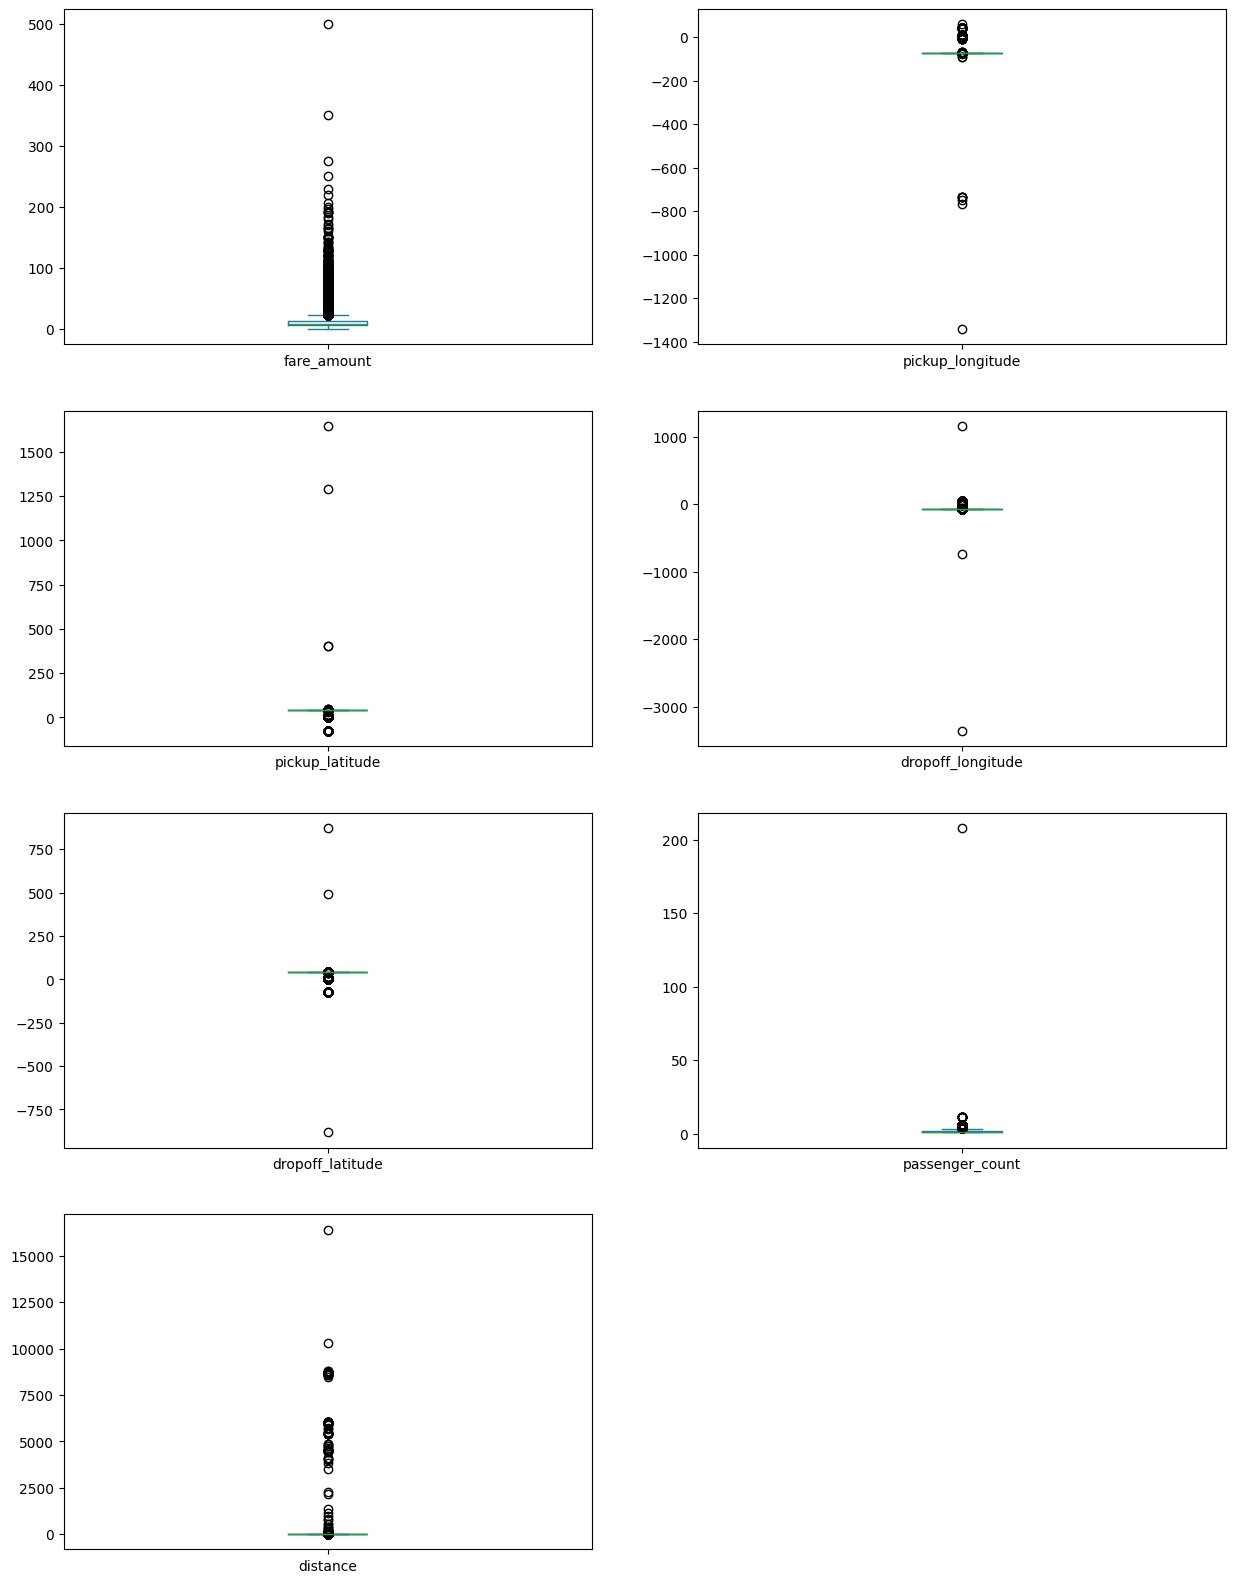

In [21]:
data.plot(kind = "box",subplots = True, layout = (4,2),figsize=(15,20))

In [22]:
# Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df1[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df1 , c)
    return df1

In [23]:
cols = ['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance']
data = treat_outliers_all(data , cols)

fare_amount             Axes(0.125,0.712609;0.352273x0.167391)
pickup_longitude     Axes(0.547727,0.712609;0.352273x0.167391)
pickup_latitude         Axes(0.125,0.511739;0.352273x0.167391)
dropoff_longitude    Axes(0.547727,0.511739;0.352273x0.167391)
dropoff_latitude         Axes(0.125,0.31087;0.352273x0.167391)
passenger_count       Axes(0.547727,0.31087;0.352273x0.167391)
distance                    Axes(0.125,0.11;0.352273x0.167391)
dtype: object

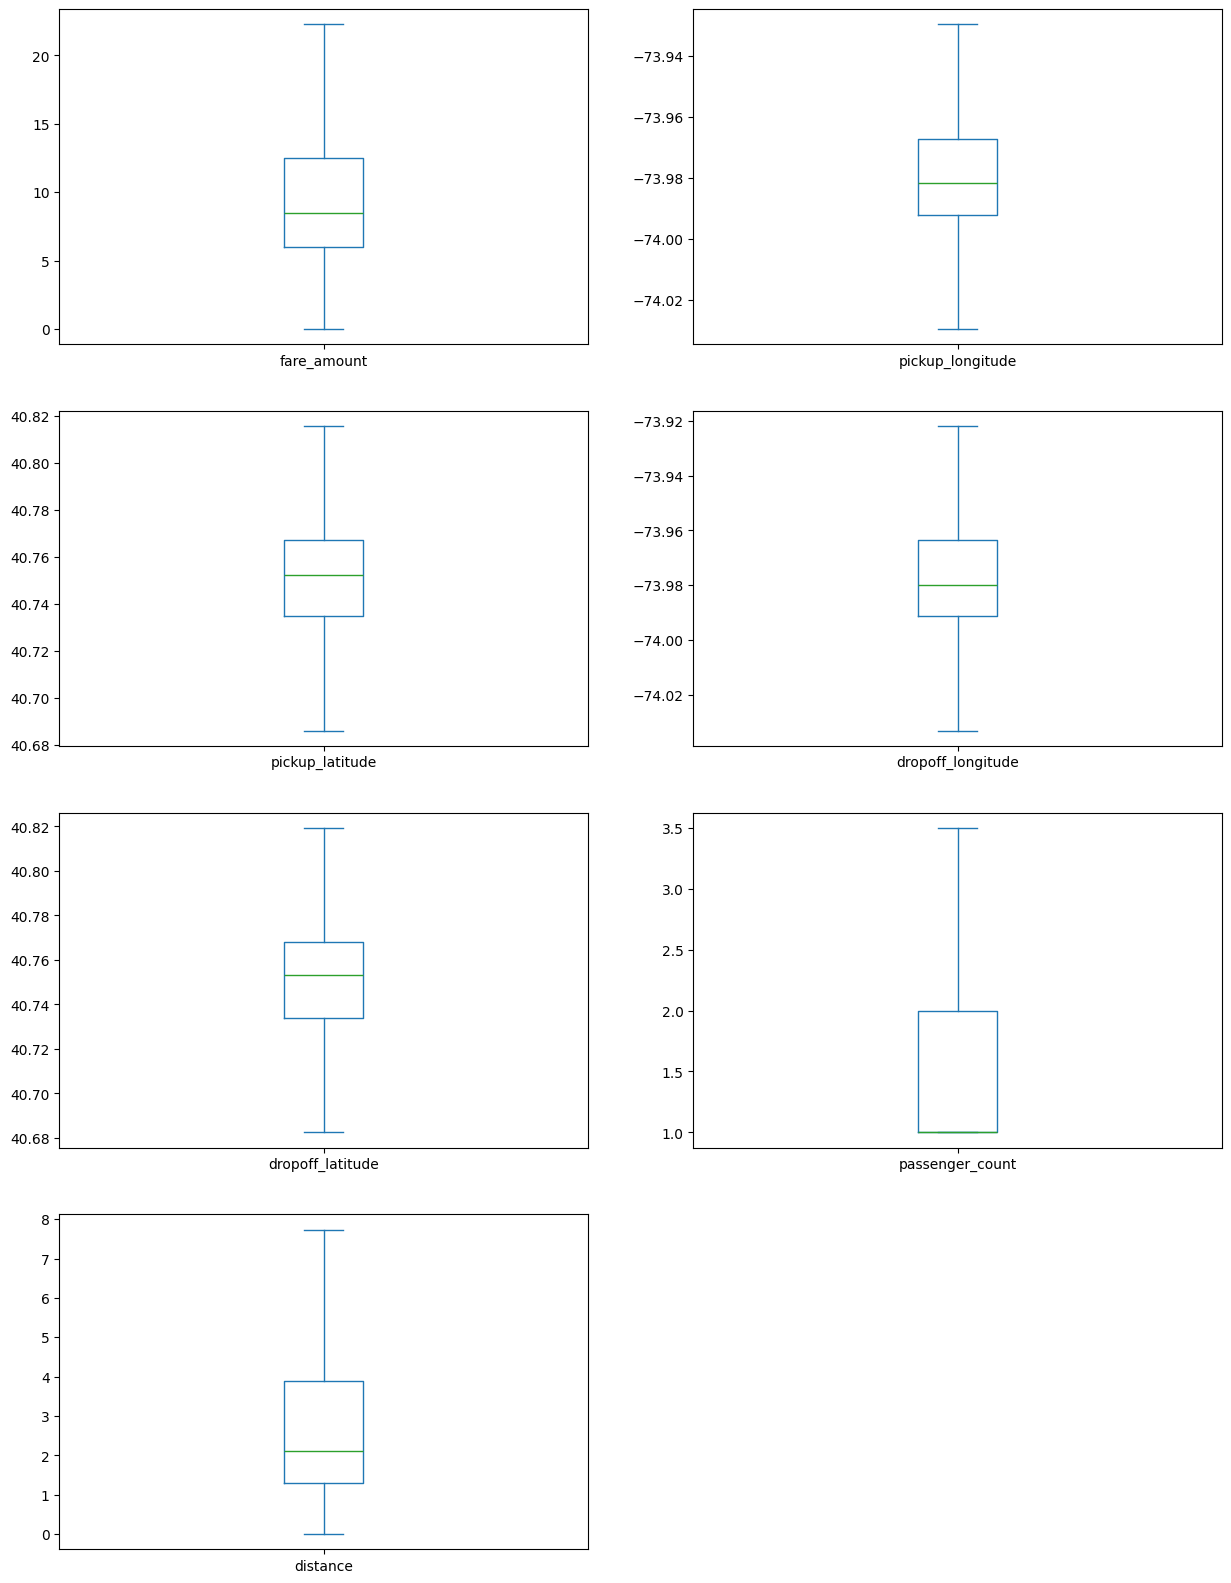

In [24]:
data.plot(kind = "box",subplots = True, layout = (4,2),figsize=(15,20))

In [25]:
data.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
month                0
hour                 0
distance             1
dtype: int64

In [26]:
data.dropna(inplace=True)


<Axes: >

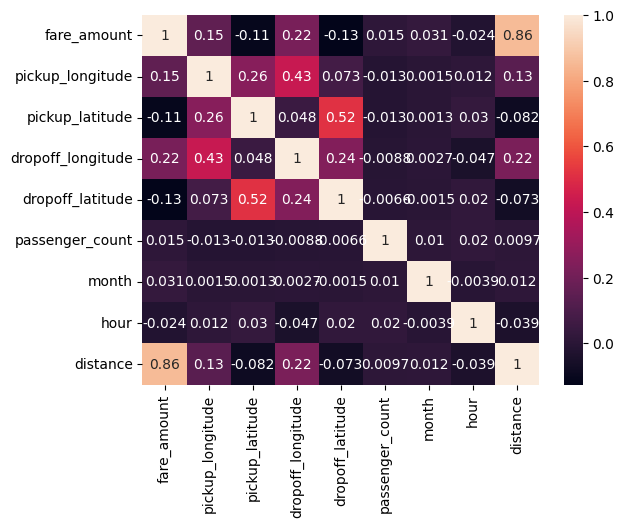

In [27]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True)

In [28]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# X = data.iloc[:, 1:]: Selects all rows and columns starting from 
# the second column (index 1) onward.
# This is stored in X, representing the input features (predictors).
# y = data.iloc[:, 0]: Selects all rows of the first column (index 0). 
# This is stored in y, representing the target variable (the variable we want to predict).

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)

In [31]:
linear_regression.score(X_test, y_test)

0.7273181311601761

In [32]:
y_pred = linear_regression.predict(X_test)

result = pd.DataFrame()
result['Actual'], result['Predicted'] = y_test, y_pred
result

,Actual,Predicted
134253,6.5,7.968119
124141,4.1,5.379466
62810,12.0,10.898727
65425,7.5,9.689120
30074,4.1,5.480646
...,...,...
155652,10.5,10.860777
95076,17.3,20.701746
63941,14.5,9.083837
14572,16.1,16.638476


In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 1.8869439363085316
Mean Squared Error: 8.04867602510606
Root Mean Squared Error: 2.8370188623105874
R Squared (R²): 0.8528294853956305


In [34]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 10, random_state = 42)

random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [35]:
random_forest.score(X_test, y_test)

0.7524112851138083

In [36]:

y_pred = random_forest.predict(X_test)

result = pd.DataFrame()
result['Actual'], result['Predicted'] = y_test, y_pred
result

,Actual,Predicted
134253,6.5,7.730
124141,4.1,5.120
62810,12.0,14.520
65425,7.5,8.680
30074,4.1,4.830
...,...,...
155652,10.5,11.080
95076,17.3,16.805
63941,14.5,14.410
14572,16.1,15.180


In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 1.7512390522020307
Mean Squared Error: 7.308008273780311
Root Mean Squared Error: 2.703332808549534
R Squared (R²): 0.8674164427273721
